<a href="https://colab.research.google.com/github/maisagerk/PerfilParticipantes/blob/main/Perfil_de_Aloca%C3%A7%C3%A3o_dos_Participantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importação de bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, date
pd.set_option('max_rows', 99999)

In [2]:
# Acessar Drive
from google.colab import drive
drive.mount('/content/drive')

import os 
workdir_path = '/content/drive/My Drive/TELOS Perfil dos Participantes'
os.chdir(workdir_path)

Mounted at /content/drive


#### Grupo de Participantes

In [3]:
# Importando o arquivo grupo
grupo = pd.read_csv('grupo.csv', delimiter= ";",  usecols=[0,1,2,3,4,5], encoding='latin-1')

# Converte o formato das colunas DtNascimento e DtIncricaoPlano para datetime
grupo['DtNascimento']= pd.to_datetime(grupo['DtNascimento'],dayfirst= True )
grupo['DtIncricaoPlano']= pd.to_datetime(grupo['DtIncricaoPlano'],dayfirst= True )

# Visualização dos dados
grupo.head()

,ID,DtNascimento,Sexo,Escolaridade,FaixaSalarial,DtIncricaoPlano
0,1,1976-01-30,M,Superior Completo,L2,2012-05-16
1,2,1978-10-30,M,Superior Completo,L1,2012-02-03
2,3,1975-11-13,F,Superior Completo,L1,2011-04-12
3,4,1955-06-02,M,Superior Completo,L1,1984-06-25
4,5,1971-03-17,F,Superior Completo,L1,2006-03-07


###### Tratamento dos Dados

In [4]:
# Existem valores nulos (por coluna)? 
print(grupo.isnull().any())

ID                 False
DtNascimento       False
Sexo               False
Escolaridade       False
FaixaSalarial      False
DtIncricaoPlano    False
dtype: bool


In [5]:
 print(grupo.shape[0])

6044


In [6]:
# Distribuição de Escolaridade
grupo['Escolaridade'].value_counts(normalize=True)

Superior Completo      0.635341
2o. Grau Completo      0.217075
Pos-Graduacao          0.095963
Superior Incompleto    0.036400
Mestrado               0.007280
2o. Grau Incompleto    0.006618
1o. Grau Completo      0.001324
Name: Escolaridade, dtype: float64

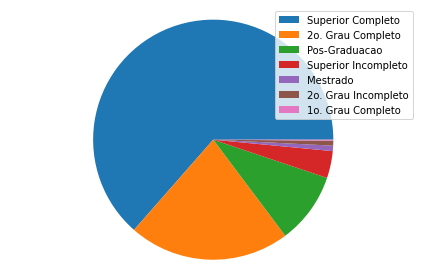

In [7]:
# Gráfico de Distribuição de Escolaridade
plt.pie(grupo.Escolaridade.value_counts());
plt.legend(labels=grupo['Escolaridade'].value_counts().index.tolist());
plt.axis('equal');
plt.tight_layout();

In [8]:
# Analisando a distribuição por Faixa Salarial dos Participantes
grupo.FaixaSalarial.value_counts()

L2    4260
L3    1282
L1     502
Name: FaixaSalarial, dtype: int64

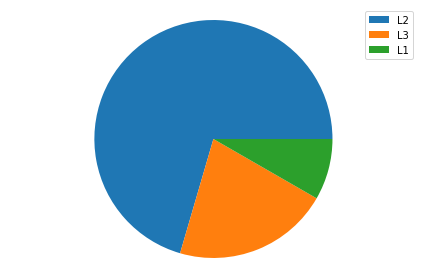

In [9]:
# Gráfico de distribuição por Faixa Salarial 
plt.pie(grupo.FaixaSalarial.value_counts());
plt.legend(labels=grupo['FaixaSalarial'].value_counts().index.tolist());
plt.axis('equal');
plt.tight_layout();

In [10]:
# Analisando a distribuição por Sexo dos Participantes
grupo.Sexo.value_counts(normalize=True)

M    0.731635
F    0.268365
Name: Sexo, dtype: float64

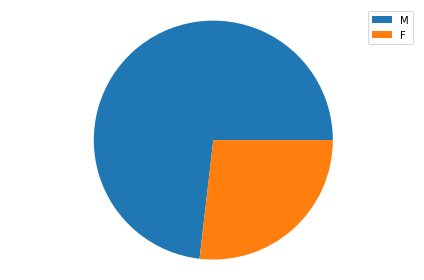

In [11]:
# Gráfico de distribuição por Sexo dos Participantes
plt.pie(grupo.Sexo.value_counts());
plt.legend(labels=grupo['Sexo'].value_counts().index.tolist());
plt.axis('equal');
plt.tight_layout();

#### Dependentes dos Participantes

In [12]:
# Importando o arquivo dependentes
dependentes_raw = pd.read_csv('dependentes.csv', delimiter= ";", encoding='latin-1')

# Visualização dos dados
dependentes_raw.head()

,ID,Parentesco,DtNascimento
0,1,Pai ou Mae,26/07/1945
1,1,Companheiro(a),28/08/1980
2,2,Conjuge,03/07/1975
3,2,Filho(a),03/07/2009
4,4,Pai ou Mae,07/11/1927


In [13]:
# Converte o formato das colunas DtNascimento para datetime
dependentes_raw['DtNascimento']= pd.to_datetime(dependentes_raw['DtNascimento'],dayfirst= True,errors='coerce')

###### Tratamento dos Dados

In [14]:
# Existem valores nulos (por coluna)? 
print(dependentes_raw.isnull().any())

ID              False
Parentesco      False
DtNascimento     True
dtype: bool


In [15]:
# Excluindo valores nulos
dependentes_clean=dependentes_raw.dropna()
print(dependentes_clean.isnull().any())

ID              False
Parentesco      False
DtNascimento    False
dtype: bool


In [16]:
dependentes_clean.head()

,ID,Parentesco,DtNascimento
0,1,Pai ou Mae,1945-07-26
1,1,Companheiro(a),1980-08-28
2,2,Conjuge,1975-07-03
3,2,Filho(a),2009-07-03
4,4,Pai ou Mae,1927-11-07


In [17]:
# Criando nova tabela sem valores nulos
dependentes = pd.merge(dependentes_raw, dependentes_clean, how='left', on=['ID','Parentesco','DtNascimento'])
dependentes.head()

,ID,Parentesco,DtNascimento
0,1,Pai ou Mae,1945-07-26
1,1,Companheiro(a),1980-08-28
2,2,Conjuge,1975-07-03
3,2,Filho(a),2009-07-03
4,4,Pai ou Mae,1927-11-07


In [18]:
# Volume de dados
print(dependentes.shape[0])

17049


In [19]:
# Observou-se que existia uma separação entre Filho maior de 24 anos e Filho, porém para este estudo, não é necessária essa distinção
dependentes.loc[dependentes['Parentesco'].str.contains('Filho'),'Parentesco'] = 'Filho(a)'

In [20]:
# Observou-se que tem alguns dados repetidos --> Escluir linhas repetidas

In [21]:
# Analisando a distribuição dos dependentes dos Participantes
dependentes.Parentesco.value_counts(normalize=True)

Filho(a)             0.363071
Pai ou Mae           0.250572
Conjuge              0.213913
Irmao ou Irma        0.102469
Designado            0.036952
Companheiro(a)       0.025691
Enteado(a)           0.003930
Ex-Conjuge           0.001408
Sogro(a)             0.001232
Menor sob Guarda     0.000411
Ex-Companheiro(a)    0.000352
Name: Parentesco, dtype: float64

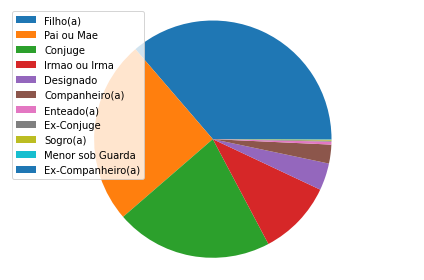

In [22]:
# Gráfico da distribuição de Parentesco
plt.pie(dependentes.Parentesco.value_counts());
plt.legend(labels=dependentes['Parentesco'].value_counts().index.tolist());
plt.axis('equal');
plt.tight_layout();

#### Histórico de Contribuição dos Participantes

In [23]:
# Importando o arquivo historico contibuicao
historicoctb = pd.read_csv('historico ctb.csv', delimiter= ";",decimal=',')

# Converte o formato das colunas DtNascimento para datetime
historicoctb['DtVigencia']= pd.to_datetime(historicoctb['DtVigencia'],dayfirst= True)

# Visualização dos dados
historicoctb.head()

,ID,DtVigencia,CtbBasica,CtbAdicional
0,1,2012-05-16,4.0,0.0
1,2,2012-02-03,8.0,0.0
2,3,2011-04-12,5.0,0.0
3,4,1999-01-01,8.0,0.0
4,4,2004-01-01,8.0,4.0


In [24]:
# Criando coluna com a soma das Contribuições (CtbBasica + CtbAdicional)
sum_column = historicoctb["CtbBasica"] + historicoctb["CtbAdicional"]
historicoctb["Contribuicao"] = sum_column
historicoctb.head()

,ID,DtVigencia,CtbBasica,CtbAdicional,Contribuicao
0,1,2012-05-16,4.0,0.0,4.0
1,2,2012-02-03,8.0,0.0,8.0
2,3,2011-04-12,5.0,0.0,5.0
3,4,1999-01-01,8.0,0.0,8.0
4,4,2004-01-01,8.0,4.0,12.0


###### Tratamento dos Dados

In [25]:
# Existem valores nulos (por coluna)? 
print(historicoctb.isnull().any())

ID              False
DtVigencia      False
CtbBasica       False
CtbAdicional    False
Contribuicao    False
dtype: bool


In [26]:
len(historicoctb)

11505

In [27]:
# Limpando inconsistências

# 1. % Ctb. Basica = 0 e % Ctb. Adicional = 0 -> se participante parou de contribuir, não tem relevância para o estudo
historicoctb = historicoctb[historicoctb.Contribuicao != 0]

# 2. Contribuição > 8% -> pelo Regulamento do Plano, o máximo que já foi permitido, foi de 8% de Contribuição Básica
historicoctb = historicoctb[historicoctb.CtbBasica < 9.0]

#ID 4 apresentou 54% de contribuição adicional em 21/05/2012

In [28]:
 # Checando quantos dados restam
len(historicoctb)

11415

In [29]:
# Visualizando informações mais relevantes
contribuicao = historicoctb [['ID', 'DtVigencia', 'Contribuicao']] 
contribuicao.head()

,ID,DtVigencia,Contribuicao
0,1,2012-05-16,4.0
1,2,2012-02-03,8.0
2,3,2011-04-12,5.0
3,4,1999-01-01,8.0
4,4,2004-01-01,12.0


In [30]:
# Analisando a distribuição das Contribuições dos Participantes
contribuicao.Contribuicao.value_counts(normalize=True)

8.0     0.303285
4.0     0.189750
3.0     0.100832
12.0    0.095313
5.0     0.095050
6.0     0.053176
10.0    0.044503
7.0     0.041524
2.0     0.017784
1.0     0.014192
9.0     0.008060
15.0    0.005869
16.0    0.005344
14.0    0.005081
20.0    0.004906
11.0    0.004818
13.0    0.003329
18.0    0.001752
17.0    0.001139
30.0    0.000701
25.0    0.000613
22.0    0.000438
23.0    0.000438
26.0    0.000350
32.0    0.000175
24.0    0.000175
19.0    0.000175
34.0    0.000175
35.0    0.000175
33.0    0.000175
62.0    0.000088
45.0    0.000088
21.0    0.000088
52.0    0.000088
29.0    0.000088
50.0    0.000088
28.0    0.000088
55.0    0.000088
Name: Contribuicao, dtype: float64

In [31]:
# Analisando a distribuição dos dados de Contribuição
contribuicao['Contribuicao'].describe()

count    11415.000000
mean         6.899956
std          3.568717
min          1.000000
25%          4.000000
50%          7.000000
75%          8.000000
max         62.000000
Name: Contribuicao, dtype: float64

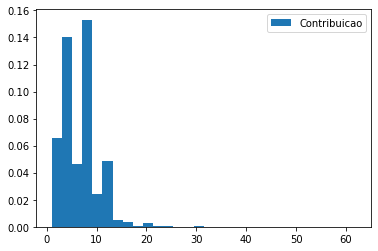

In [32]:
# Gráfico de Distribuição das Contribuições
plt.hist(contribuicao['Contribuicao'], bins=30, label='Contribuicao', density=True)
plt.legend();

#### Histórico do Perfil dos Participantes

In [33]:
# Importando o arquivo historico perfil
historicoprfl = pd.read_csv('historico perfil.csv', delimiter= ";", decimal=',', encoding='latin-1')

# convert the 'Date' column to datetime format
historicoprfl['DtVigencia']= pd.to_datetime(historicoprfl['DtVigencia'],dayfirst= True )

# Visualização dos dados
historicoprfl.head()

,ID,DtVigencia,TipoPerfil,Alocacao
0,1,2012-05-16,Renda Fixa,60.0
1,1,2012-05-16,Renda Variavel,40.0
2,1,2012-11-01,Renda Fixa,60.0
3,1,2012-11-01,Renda Variavel,40.0
4,1,2013-11-01,Renda Fixa,60.0


In [34]:
# Agrupando casos em que um mesmo TipoPerfil aparece para mesmo ID e DtVigencia
grupoperfil = historicoprfl.groupby(["ID","DtVigencia","TipoPerfil"])
grupoperfil = grupoperfil.sum()
grupoperfil.head()

Alocacao
ID DtVigencia TipoPerfil              
1  2012-05-16 Renda Fixa          60.0
              Renda Variavel      40.0
   2012-11-01 Renda Fixa          60.0
              Renda Variavel      40.0
   2013-11-01 Renda Fixa          60.0

In [35]:
# Reorganizando a tabela
grupoperfil = grupoperfil.reset_index()
grupoperfil.head()

,ID,DtVigencia,TipoPerfil,Alocacao
0,1,2012-05-16,Renda Fixa,60.0
1,1,2012-05-16,Renda Variavel,40.0
2,1,2012-11-01,Renda Fixa,60.0
3,1,2012-11-01,Renda Variavel,40.0
4,1,2013-11-01,Renda Fixa,60.0


###### Tratamento dos Dados

In [36]:
# Existem valores nulos (por coluna)? 
print(grupoperfil.isnull().any())

ID            False
DtVigencia    False
TipoPerfil    False
Alocacao      False
dtype: bool


In [37]:
# Criando uma nova tabela (perfil) com colunas de RendaFixa e RendaVariavel 
rendafixa = grupoperfil.loc[grupoperfil['TipoPerfil'] == 'Renda Fixa']
rendafixa = rendafixa.drop(columns=['TipoPerfil'])
rendafixa = rendafixa.rename(columns={"Alocacao":"RendaFixa"}) 
rendavariavel = grupoperfil.loc[grupoperfil['TipoPerfil'] == 'Renda Variavel']
rendavariavel = rendavariavel.drop(columns=['TipoPerfil'])
perfil = pd.merge(rendafixa, rendavariavel, how='left', on=['ID','DtVigencia'])
perfil = perfil.rename(columns={"Alocacao":"RendaVariavel"}) 
perfil.head()

,ID,DtVigencia,RendaFixa,RendaVariavel
0,1,2012-05-16,60.0,40.0
1,1,2012-11-01,60.0,40.0
2,1,2013-11-01,60.0,40.0
3,1,2014-11-01,60.0,40.0
4,1,2015-07-01,60.0,40.0


In [38]:
# Conferindo dimensão da tabela rendafixa
len(rendafixa)

65340

In [39]:
# Conferindo dimensão da tabela rendavariavel
len(rendavariavel)

40735

In [40]:
# Conferindo dimensão da tabela perfil -- tem que ser igual a rendafixa
len(perfil)

65340

In [41]:
# tem dados nulos?
print(perfil.isnull().any())

ID               False
DtVigencia       False
RendaFixa        False
RendaVariavel     True
dtype: bool


In [42]:
# Preenchendo dados nulos com 0, pois Alocação Total (Renda Fixa + Renda Variável) = 100%
perfil['RendaVariavel'] = perfil['RendaVariavel'].fillna(0)
print(perfil.isnull().any())

ID               False
DtVigencia       False
RendaFixa        False
RendaVariavel    False
dtype: bool


In [43]:
# Criando coluna com a soma das Alocações (RendaFixa + RendaVariavel) para checar se total = 100%
sum_alocacao = perfil["RendaFixa"] + perfil["RendaVariavel"]
perfil["AlocacaoTotal"]  = sum_alocacao
perfil.head()

,ID,DtVigencia,RendaFixa,RendaVariavel,AlocacaoTotal
0,1,2012-05-16,60.0,40.0,100.0
1,1,2012-11-01,60.0,40.0,100.0
2,1,2013-11-01,60.0,40.0,100.0
3,1,2014-11-01,60.0,40.0,100.0
4,1,2015-07-01,60.0,40.0,100.0


In [44]:
# Existe AlocacaoTotal <> 100% ?
inconsistencia_perfil = perfil[perfil.AlocacaoTotal != 100]
inconsistencia_perfil

,ID,DtVigencia,RendaFixa,RendaVariavel,AlocacaoTotal


In [45]:
# Selecionando colunas relevantes e ordenando por DtVigencia para analisar alterações de alocação ao longo do tempo
perfil = perfil [['ID', 'DtVigencia', 'RendaFixa', 'RendaVariavel']]
perfil.sort_values(by="DtVigencia")
perfil.head() 

,ID,DtVigencia,RendaFixa,RendaVariavel
0,1,2012-05-16,60.0,40.0
1,1,2012-11-01,60.0,40.0
2,1,2013-11-01,60.0,40.0
3,1,2014-11-01,60.0,40.0
4,1,2015-07-01,60.0,40.0


###### Análise dos Dados

In [46]:
# Analisando Alterações de Alocação

# Alteração de Alocação em Renda Fixa
perfil["DiffAlocacao"]  = perfil.RendaFixa.diff()

# Alteração de ID
perfil["DiffID"] = perfil.ID.diff()

# Alteração de Data
perfil["DiffData"] = perfil.DtVigencia.diff()

# Quando não tem com o que comparar, preenche com n/a, então substitui na por 0
perfil['DiffAlocacao'] = perfil['DiffAlocacao'].fillna(0)
perfil['DiffID'] = perfil['DiffID'].fillna(0)
perfil["DiffData"] = perfil["DiffData"].fillna(timedelta(days=0))

# Visualizando a nova tabela perfil
perfil.head()

,ID,DtVigencia,RendaFixa,RendaVariavel,DiffAlocacao,DiffID,DiffData
0,1,2012-05-16,60.0,40.0,0.0,0.0,0 days
1,1,2012-11-01,60.0,40.0,0.0,0.0,169 days
2,1,2013-11-01,60.0,40.0,0.0,0.0,365 days
3,1,2014-11-01,60.0,40.0,0.0,0.0,365 days
4,1,2015-07-01,60.0,40.0,0.0,0.0,242 days


In [47]:
len(perfil)

65340

In [48]:
# Criando tabela com as alocação na DtVigencia mais recente
ultimoperfil = perfil[perfil.DtVigencia == max(perfil.DtVigencia)]
ultimoperfil.head()

,ID,DtVigencia,RendaFixa,RendaVariavel,DiffAlocacao,DiffID,DiffData
10,1,2020-11-03,60.0,40.0,0.0,0.0,368 days
21,2,2020-11-03,80.0,20.0,0.0,0.0,368 days
32,3,2020-11-03,80.0,20.0,0.0,0.0,368 days
53,4,2020-11-03,95.0,5.0,0.0,0.0,368 days
71,5,2020-11-03,100.0,0.0,0.0,0.0,368 days


###Analisando o perfil dos participantes que têm Renda Variavel

In [49]:
# Montando tabela de IDs com alocação mais recente em Renda Variável --> ver perfil de participante que tem Renda Variável hoje
alocRV = ultimoperfil[perfil.RendaVariavel > 0]
alocRV = alocRV.drop(columns=['RendaFixa','DiffAlocacao','DiffData','DiffID'])
alocRV.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,ID,DtVigencia,RendaVariavel
10,1,2020-11-03,40.0
21,2,2020-11-03,20.0
32,3,2020-11-03,20.0
53,4,2020-11-03,5.0
93,6,2020-11-03,10.0


In [50]:
# Quantidade de dados nessa tabela
len(alocRV)

3737

####Analisando as características dos participantes que têm Renda Variavel

In [51]:
# Criando uma nova tabela com todos os ID's dos que têm alocação em Renda Variável, juntando com a tabela grupo
grupo_alocRV = pd.merge(alocRV, grupo, how='left', on=['ID'])
grupo_alocRV = grupo_alocRV.drop(columns=['RendaVariavel','DtVigencia'])
grupo_alocRV.head()

,ID,DtNascimento,Sexo,Escolaridade,FaixaSalarial,DtIncricaoPlano
0,1,1976-01-30,M,Superior Completo,L2,2012-05-16
1,2,1978-10-30,M,Superior Completo,L1,2012-02-03
2,3,1975-11-13,F,Superior Completo,L1,2011-04-12
3,4,1955-06-02,M,Superior Completo,L1,1984-06-25
4,6,1956-04-03,M,Superior Completo,L1,1976-05-24


In [52]:
# Analisando se existe um grupo de participantes específico que aloca em Renda Variável
grupo_alocRV.DtNascimento.describe(datetime_is_numeric=True)
# Observa-se que mais da metade dos participantes estão atualmente alocados em Renda Variável (3737 de 6044), sendo um grupo bem diverso

count                             3737
mean     1977-06-30 08:32:06.679153792
min                1948-12-29 00:00:00
25%                1971-07-06 00:00:00
50%                1978-10-30 00:00:00
75%                1984-03-05 00:00:00
max                2001-02-02 00:00:00
Name: DtNascimento, dtype: object

In [53]:
# Considerando que o grupo é bem variado, não há uma expectativa sobre a Data de Inscrição no Plano
grupo_alocRV.DtIncricaoPlano.describe(datetime_is_numeric=True)

count                             3737
mean     2010-06-28 15:08:14.193206016
min                1975-08-01 00:00:00
25%                2005-11-22 00:00:00
50%                2014-01-24 00:00:00
75%                2018-11-06 00:00:00
max                2020-09-30 00:00:00
Name: DtIncricaoPlano, dtype: object

In [54]:
# Analisando a distribuição de Escolaridade neste grupo
grupo_alocRV['Escolaridade'].value_counts(normalize=True)

Superior Completo      0.628579
2o. Grau Completo      0.222638
Pos-Graduacao          0.096334
Superior Incompleto    0.037463
Mestrado               0.006957
2o. Grau Incompleto    0.006690
1o. Grau Completo      0.001338
Name: Escolaridade, dtype: float64

In [55]:
# Analisando a distribuição de Escolaridade no grupo total
grupo['Escolaridade'].value_counts(normalize=True)

Superior Completo      0.635341
2o. Grau Completo      0.217075
Pos-Graduacao          0.095963
Superior Incompleto    0.036400
Mestrado               0.007280
2o. Grau Incompleto    0.006618
1o. Grau Completo      0.001324
Name: Escolaridade, dtype: float64

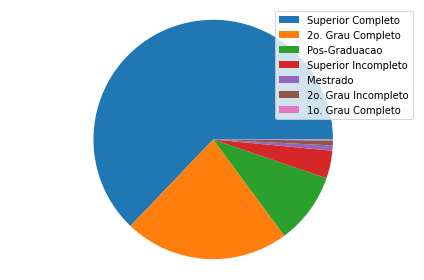

In [56]:
# Gráfico de Distribuição de Escolaridade 
# Observa-se que a proporção de "Superior Completo" é pouco menor nesse grupo do que no grupo total 
# e que a proporção de "2º Grau Completo" é pouco maior
plt.pie(grupo_alocRV.Escolaridade.value_counts());
plt.legend(labels=grupo_alocRV['Escolaridade'].value_counts().index.tolist());
plt.axis('equal');
plt.tight_layout();

In [57]:
# Analisando a distribuição de Sexo neste grupo
grupo_alocRV['Sexo'].value_counts(normalize=True)

M    0.759433
F    0.240567
Name: Sexo, dtype: float64

In [58]:
# Analisando a distribuição de Sexo no grupo total
grupo['Sexo'].value_counts(normalize=True)

M    0.731635
F    0.268365
Name: Sexo, dtype: float64

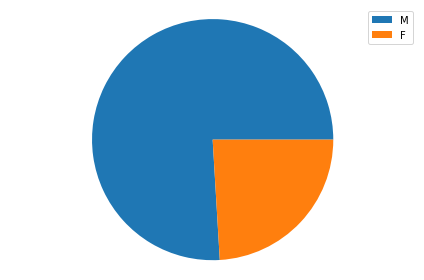

In [59]:
# Gráfico de Distribuição de Sexo
# Observa-se que a proporção de homens nesse grupo é pouco maior do que no grupo total
plt.pie(grupo_alocRV.Sexo.value_counts());
plt.legend(labels=grupo_alocRV['Sexo'].value_counts().index.tolist());
plt.axis('equal');
plt.tight_layout();

In [60]:
# Analisando a Distribuição de Faixa Salarial neste grupo
grupo_alocRV['FaixaSalarial'].value_counts(normalize=True)

L2    0.697083
L3    0.220498
L1    0.082419
Name: FaixaSalarial, dtype: float64

In [61]:
# Analisando a Distribuição de Faixa Salarial no grupo total
grupo['FaixaSalarial'].value_counts(normalize=True)

L2    0.704831
L3    0.212111
L1    0.083058
Name: FaixaSalarial, dtype: float64

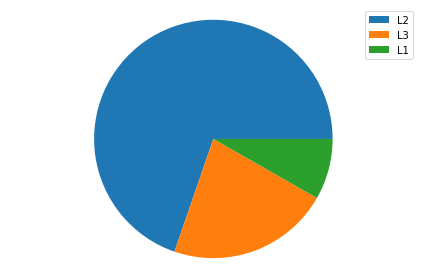

In [62]:
# Gráfico de Distribuição de Faixa Salarial 
# Observa-se que a proporção de L2 é pouco menor neste grupo do que no grupo total e de L3 é pouco maior
plt.pie(grupo_alocRV.FaixaSalarial.value_counts());
plt.legend(labels=grupo_alocRV['FaixaSalarial'].value_counts().index.tolist());
plt.axis('equal');
plt.tight_layout();

####Analisando as características dos dependentes dos participantes que têm Renda Variavel

In [63]:
# Criando uma nova tabela com todos os ID's dos que têm alocações em Renda Variável, juntando com a tabela dependentes
dependentes_alocRV = pd.merge(alocRV, dependentes, how='left', on=['ID'])
dependentes_alocRV = dependentes_alocRV.drop(columns=['RendaVariavel','DtVigencia'])
dependentes_alocRV.head()

,ID,Parentesco,DtNascimento
0,1,Pai ou Mae,1945-07-26
1,1,Companheiro(a),1980-08-28
2,2,Conjuge,1975-07-03
3,2,Filho(a),2009-07-03
4,3,NaN,NaT


In [64]:
# Excluindo valores nulos
dependentes_alocRV_clean=dependentes_alocRV.dropna()
print(dependentes_alocRV_clean.isnull().any())

ID              False
Parentesco      False
DtNascimento    False
dtype: bool


In [65]:
# Verificando se existe um grupo de dependentes em comum entre os participantes
# Analisando as datas de nascimento dos dependentes
dependentes_alocRV = dependentes_alocRV_clean
dependentes_alocRV.DtNascimento.describe(datetime_is_numeric=True)
# Observa-se que é um grupo bem diverso

count                            10463
mean     1980-09-03 11:31:59.564180416
min                1900-01-01 00:00:00
25%                1962-03-26 00:00:00
50%                1982-04-30 00:00:00
75%                1999-12-21 12:00:00
max                2020-11-01 00:00:00
Name: DtNascimento, dtype: object

In [66]:
# Analisando a distribuição de Parentesco neste grupo
dependentes_alocRV['Parentesco'].value_counts(normalize=True)

Filho(a)             0.365383
Pai ou Mae           0.253369
Conjuge              0.214566
Irmao ou Irma        0.100545
Designado            0.034598
Companheiro(a)       0.024563
Enteado(a)           0.003823
Ex-Conjuge           0.001434
Sogro(a)             0.000956
Ex-Companheiro(a)    0.000478
Menor sob Guarda     0.000287
Name: Parentesco, dtype: float64

In [67]:
# Analisando a distribuição de Parentesco no grupo total
dependentes['Parentesco'].value_counts(normalize=True)

Filho(a)             0.363071
Pai ou Mae           0.250572
Conjuge              0.213913
Irmao ou Irma        0.102469
Designado            0.036952
Companheiro(a)       0.025691
Enteado(a)           0.003930
Ex-Conjuge           0.001408
Sogro(a)             0.001232
Menor sob Guarda     0.000411
Ex-Companheiro(a)    0.000352
Name: Parentesco, dtype: float64

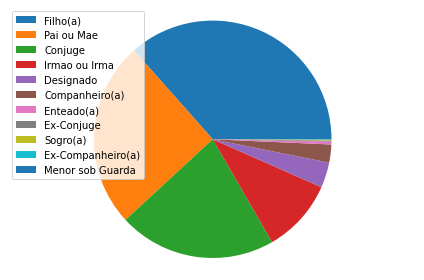

In [68]:
# Gráfico de Distribuição de Parentesco 
# Observa-se que a distribuição é bem similar a do grupo total
plt.pie(dependentes_alocRV.Parentesco.value_counts());
plt.legend(labels=dependentes_alocRV['Parentesco'].value_counts().index.tolist());
plt.axis('equal');
plt.tight_layout();

####Analisando as características das Contribuições dos participantes que têm Renda Variavel

In [69]:
# Criando tabela com IDs e  maior DtVigencia da Contribuicao
# Agrupando dados com mesmo ID
IDcontribuicao = contribuicao.groupby(["ID"])
ultimacontribuicao = IDcontribuicao['DtVigencia'].max()
ultimacontribuicao = ultimacontribuicao.reset_index()
ultimacontribuicao.head(10)

,ID,DtVigencia
0,1,2012-05-16
1,2,2012-02-03
2,3,2011-04-12
3,4,2012-05-21
4,5,2006-03-07
5,6,2010-01-01
6,7,1999-01-01
7,8,2015-05-01
8,9,2012-01-01
9,10,1999-01-01


In [70]:
# Inserindo a coluna Contribuicao de volta na tabela
contribuicao_ult = pd.merge(ultimacontribuicao, contribuicao, how='left', on=['ID','DtVigencia'])

In [71]:
print(contribuicao_ult.isnull().any())

ID              False
DtVigencia      False
Contribuicao    False
dtype: bool


In [72]:
print(alocRV.isnull().any())

ID               False
DtVigencia       False
RendaVariavel    False
dtype: bool


In [73]:
# Criando uma nova tabela com todos os ID's dos que têm alocações em Renda Variável, juntando com a tabela dependentes
contribuicao_alocRV = pd.merge(alocRV, contribuicao_ult, how='inner', on=['ID'])
contribuicao_alocRV = contribuicao_alocRV.drop(columns=['RendaVariavel','DtVigencia_y'])
contribuicao_alocRV = contribuicao_alocRV.rename(columns={"DtVigencia_x": "DtVigencia"})
contribuicao_alocRV.head()

,ID,DtVigencia,Contribuicao
0,1,2020-11-03,4.0
1,2,2020-11-03,8.0
2,3,2020-11-03,5.0
3,4,2020-11-03,62.0
4,6,2020-11-03,15.0


In [74]:
print(contribuicao_alocRV.isnull().any())

ID              False
DtVigencia      False
Contribuicao    False
dtype: bool


In [75]:
# Verificando se é um grupo de participantes com uma característica específica de contribuições
contribuicao_alocRV.Contribuicao.describe()
# Observa-se que é um grupo bem diverso e similar ao grupo total

count    3720.000000
mean        6.734140
std         3.314235
min         1.000000
25%         4.000000
50%         7.000000
75%         8.000000
max        62.000000
Name: Contribuicao, dtype: float64

In [76]:
# Verificando a moda desta distribuição
contribuicao_alocRV.Contribuicao.mode()

0    8.0
dtype: float64

In [77]:
# Verificando a distribuição da Contribuição do grupo total
contribuicao.Contribuicao.describe()

count    11415.000000
mean         6.899956
std          3.568717
min          1.000000
25%          4.000000
50%          7.000000
75%          8.000000
max         62.000000
Name: Contribuicao, dtype: float64

In [78]:
# Verificando a moda desta distribuição
contribuicao.Contribuicao.mode()

0    8.0
dtype: float64

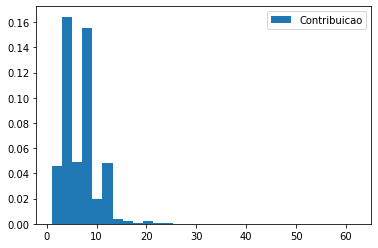

In [79]:
# Gráfico de Distribuição das Contribuições
plt.hist(contribuicao_alocRV['Contribuicao'], bins=30, label='Contribuicao', density=True)
plt.legend();
# Observa-se um comportamento muito próximo ao do grupo total

###Analisando o perfil dos 25% dos participantes que mais têm Renda Variável

In [80]:
# Na tabela perfil, observa-se que 25% dos participantes têm entre 30% e 60% de alocação em Renda Variável
ultimoperfil.RendaVariavel.describe()

count    6042.000000
mean       18.587223
std        21.075119
min         0.000000
25%         0.000000
50%        10.000000
75%        30.000000
max        60.000000
Name: RendaVariavel, dtype: float64

In [81]:
# Montando tabela de IDs com alocação de pelo menos 30% em Renda Variável
maioresRV = ultimoperfil[ultimoperfil.RendaVariavel >= 30]
maioresRV = maioresRV.drop(columns=['RendaFixa','DiffAlocacao','DiffData','DiffID'])
maioresRV.head()

,ID,DtVigencia,RendaVariavel
10,1,2020-11-03,40.0
784,41,2020-11-03,50.0
927,54,2020-11-03,60.0
1552,88,2020-11-03,30.0
1598,92,2020-11-03,50.0


####Analisando as características dos participantes que mais têm Renda Variável

In [82]:
# Criando uma nova tabela com todos os ID's e características dos que têm maiores alocações em Renda Variável
grupo_maioresRV = pd.merge(maioresRV, grupo, how='left', on=['ID'])
grupo_maioresRV.head()

,ID,DtVigencia,RendaVariavel,DtNascimento,Sexo,Escolaridade,FaixaSalarial,DtIncricaoPlano
0,1,2020-11-03,40.0,1976-01-30,M,Superior Completo,L2,2012-05-16
1,41,2020-11-03,50.0,1980-09-15,F,2o. Grau Completo,L1,2017-04-18
2,54,2020-11-03,60.0,1980-03-05,F,Superior Completo,L1,2019-03-14
3,88,2020-11-03,30.0,1976-11-23,M,2o. Grau Completo,L2,2019-05-31
4,92,2020-11-03,50.0,1985-12-06,M,Superior Completo,L2,2019-01-02


In [83]:
# É esperado que a idade máxima seja <55 anos,
# pois existe uma regra do plano que participantes elegíveis (maiores de 55 anos) só podem alocar até 20% em RV
grupo_maioresRV.DtNascimento.describe(datetime_is_numeric=True)

count                             1774
mean     1981-10-06 09:58:14.475761024
min                1970-11-07 00:00:00
25%                1977-08-04 06:00:00
50%                1981-06-15 12:00:00
75%                1986-01-05 06:00:00
max                2001-02-02 00:00:00
Name: DtNascimento, dtype: object

In [84]:
# Considerando que a idade máxima é 50 anos, espera-se que as Datas de Inscrição sejam no mínimo 1990
grupo_maioresRV.DtIncricaoPlano.describe(datetime_is_numeric=True)

count                             1774
mean     2014-07-23 18:22:19.346110208
min                1993-11-24 00:00:00
25%                2011-03-30 06:00:00
50%                2016-11-24 00:00:00
75%                2019-03-27 18:00:00
max                2020-09-30 00:00:00
Name: DtIncricaoPlano, dtype: object

In [85]:
# Analisando a distribuição de Escolaridade neste grupo
grupo_maioresRV['Escolaridade'].value_counts(normalize=True)

Superior Completo      0.605411
2o. Grau Completo      0.250282
Pos-Graduacao          0.080045
Superior Incompleto    0.049042
2o. Grau Incompleto    0.008455
Mestrado               0.006201
1o. Grau Completo      0.000564
Name: Escolaridade, dtype: float64

In [86]:
# Analisando a distribuição de Escolaridade no grupo total
grupo['Escolaridade'].value_counts(normalize=True)

Superior Completo      0.635341
2o. Grau Completo      0.217075
Pos-Graduacao          0.095963
Superior Incompleto    0.036400
Mestrado               0.007280
2o. Grau Incompleto    0.006618
1o. Grau Completo      0.001324
Name: Escolaridade, dtype: float64

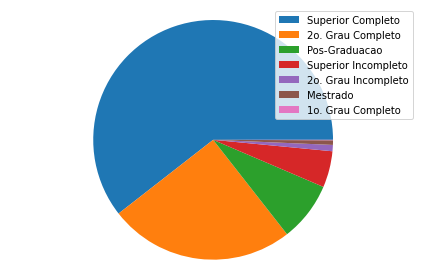

In [87]:
# Gráfico de Distribuição de Escolaridade 
# Observa-se que a proporção de "Superior Completo" é menor nesse grupo do que no grupo total e que a proporção de "2º Grau Completo" é maior
plt.pie(grupo_maioresRV.Escolaridade.value_counts());
plt.legend(labels=grupo_maioresRV['Escolaridade'].value_counts().index.tolist());
plt.axis('equal');
plt.tight_layout();

In [88]:
# Analisando a distribuição de Sexo neste grupo
grupo_maioresRV['Sexo'].value_counts(normalize=True)

M    0.782413
F    0.217587
Name: Sexo, dtype: float64

In [89]:
# Analisando a distribuição de Sexo no grupo total
grupo['Sexo'].value_counts(normalize=True)

M    0.731635
F    0.268365
Name: Sexo, dtype: float64

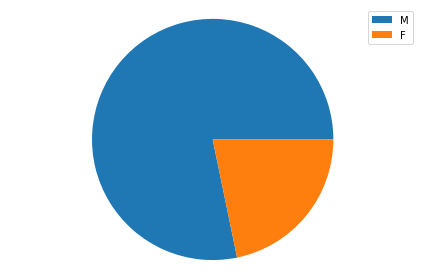

In [90]:
# Gráfico de Distribuição de Sexo
# Observa-se que a proporção de homens nesse grupo é maior do que no grupo total
plt.pie(grupo_maioresRV.Sexo.value_counts());
plt.legend(labels=grupo_maioresRV['Sexo'].value_counts().index.tolist());
plt.axis('equal');
plt.tight_layout();

In [91]:
# Analisando a Distribuição de Faixa Salarial neste grupo
grupo_maioresRV['FaixaSalarial'].value_counts(normalize=True)

L2    0.749718
L3    0.153326
L1    0.096956
Name: FaixaSalarial, dtype: float64

In [92]:
# Analisando a Distribuição de Faixa Salarial no grupo total
grupo['FaixaSalarial'].value_counts(normalize=True)

L2    0.704831
L3    0.212111
L1    0.083058
Name: FaixaSalarial, dtype: float64

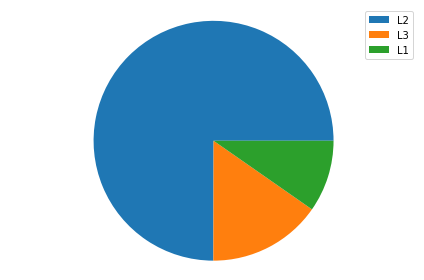

In [93]:
# Gráfico Distribuição de Faixa Salarial de Faixa Salarial
# Observa-se que a proporção de L2 é maior neste grupo do que no grupo total e de L3 é menor
plt.pie(grupo_maioresRV.FaixaSalarial.value_counts());
plt.legend(labels=grupo_maioresRV['FaixaSalarial'].value_counts().index.tolist());
plt.axis('equal');
plt.tight_layout();

####Analisando as características dos dependentes destes participantes

In [94]:
# Criando uma nova tabela com todos os ID's e dependentes dos participantes que têm maiores alocações em Renda Variável
dependentes_maioresRV = pd.merge(maioresRV, dependentes, how='left', on=['ID'])
dependentes_maioresRV = dependentes_maioresRV.drop(columns=['RendaVariavel','DtVigencia'])
dependentes_maioresRV.head()

,ID,Parentesco,DtNascimento
0,1,Pai ou Mae,1945-07-26
1,1,Companheiro(a),1980-08-28
2,41,Conjuge,1974-12-11
3,41,Filho(a),2007-06-04
4,54,Filho(a),2002-10-17


In [95]:
# Excluindo valores nulos
dependentes_maioresRV_clean=dependentes_maioresRV.dropna()
print(dependentes_maioresRV_clean.isnull().any())

ID              False
Parentesco      False
DtNascimento    False
dtype: bool


In [96]:
# Verificando se existe um grupo de dependentes em comum entre os participantes
dependentes_maioresRV = dependentes_maioresRV_clean
dependentes_maioresRV.DtNascimento.describe(datetime_is_numeric=True)
# Observa-se que é um grupo bem diverso

count                             4541
mean     1982-09-19 03:02:39.348163072
min                1900-01-01 00:00:00
25%                1962-02-08 00:00:00
50%                1982-09-08 00:00:00
75%                2004-09-16 00:00:00
max                2020-11-01 00:00:00
Name: DtNascimento, dtype: object

In [97]:
# Analisando a distribuição de Parentesco neste grupo
dependentes_maioresRV['Parentesco'].value_counts(normalize=True)

Filho(a)             0.312706
Pai ou Mae           0.290685
Conjuge              0.224620
Irmao ou Irma        0.109888
Designado            0.035455
Companheiro(a)       0.018498
Enteado(a)           0.003964
Ex-Conjuge           0.001762
Sogro(a)             0.001321
Menor sob Guarda     0.000661
Ex-Companheiro(a)    0.000440
Name: Parentesco, dtype: float64

In [98]:
# Analisando a distribuição de Parentesco no grupo total
dependentes['Parentesco'].value_counts(normalize=True)

Filho(a)             0.363071
Pai ou Mae           0.250572
Conjuge              0.213913
Irmao ou Irma        0.102469
Designado            0.036952
Companheiro(a)       0.025691
Enteado(a)           0.003930
Ex-Conjuge           0.001408
Sogro(a)             0.001232
Menor sob Guarda     0.000411
Ex-Companheiro(a)    0.000352
Name: Parentesco, dtype: float64

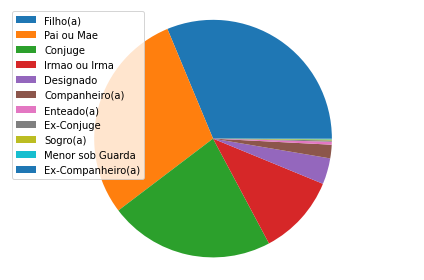

In [99]:
# Gráfico de Distribuição de Parentesco 
# Observa-se que a proporção de Filho(a) é menor neste grupo do que no grupo total, e a proporção de Pai ou Mae é maior
plt.pie(dependentes_maioresRV.Parentesco.value_counts());
plt.legend(labels=dependentes_maioresRV['Parentesco'].value_counts().index.tolist());
plt.axis('equal');
plt.tight_layout();

####Analisando as contribuições destes participantes

In [100]:
# Criando uma nova tabela com todos os ID's com as contribuições dos participantes que têm maiores alocações em Renda Variável
contribuicao_maioresRV = pd.merge(maioresRV, contribuicao_ult, how='inner', on=['ID'])
contribuicao_maioresRV = contribuicao_maioresRV.drop(columns=['RendaVariavel','DtVigencia_y'])
contribuicao_maioresRV = contribuicao_maioresRV.rename(columns={"DtVigencia_x": "DtVigencia"})
contribuicao_maioresRV.head()

,ID,DtVigencia,Contribuicao
0,1,2020-11-03,4.0
1,41,2020-11-03,4.0
2,54,2020-11-03,4.0
3,88,2020-11-03,4.0
4,92,2020-11-03,4.0


In [101]:
# Verificando se é um grupo de participantes com uma característica específica de contribuições
contribuicao_maioresRV.Contribuicao.describe()
# Observa-se que é um grupo bem diverso, porém diferente do grupo total, já que apresenta menores contribuições

count    1769.000000
mean        5.984737
std         2.776211
min         1.000000
25%         4.000000
50%         5.000000
75%         8.000000
max        20.000000
Name: Contribuicao, dtype: float64

In [102]:
# Verificando a moda desta distribuição
contribuicao_maioresRV.Contribuicao.mode()

0    4.0
dtype: float64

In [103]:
# Verificando a distribuição do grupo total
contribuicao.Contribuicao.describe()

count    11415.000000
mean         6.899956
std          3.568717
min          1.000000
25%          4.000000
50%          7.000000
75%          8.000000
max         62.000000
Name: Contribuicao, dtype: float64

In [104]:
# Verificando a moda desta distribuição
contribuicao.Contribuicao.mode()

0    8.0
dtype: float64

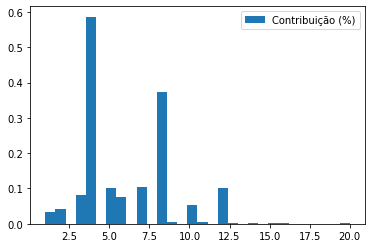

In [105]:
# Gráfico de Distribuição das Contribuições
plt.hist(contribuicao_maioresRV['Contribuicao'], bins=30, label='Contribuição (%)', density=True)
plt.legend();
# Observa-se que a média, o desvio padrão e a moda são menores do que o grupo total, com um máximo de contribuição = 20%

###Analisando o perfil dos participantes que têm Renda Fixa (todos)

In [106]:
# Montando tabela de IDs com alocação mais recente em Renda Fixa
# São todos os participantes, porque a alocação máxima permitida em RV é 60%
alocRF = ultimoperfil[ultimoperfil.RendaFixa > 0]
alocRF = alocRF.drop(columns=['RendaVariavel','DiffAlocacao','DiffData','DiffID'])
alocRF.head()

,ID,DtVigencia,RendaFixa
10,1,2020-11-03,60.0
21,2,2020-11-03,80.0
32,3,2020-11-03,80.0
53,4,2020-11-03,95.0
71,5,2020-11-03,100.0


####Analisando as características dos participantes que têm Renda Fixa

In [107]:
# Criando uma nova tabela com todos os ID's e características dos participantes que têm alocação em Renda Fixa
grupo_alocRF = pd.merge(alocRF, grupo, how='left', on=['ID'])
grupo_alocRF.head()

,ID,DtVigencia,RendaFixa,DtNascimento,Sexo,Escolaridade,FaixaSalarial,DtIncricaoPlano
0,1,2020-11-03,60.0,1976-01-30,M,Superior Completo,L2,2012-05-16
1,2,2020-11-03,80.0,1978-10-30,M,Superior Completo,L1,2012-02-03
2,3,2020-11-03,80.0,1975-11-13,F,Superior Completo,L1,2011-04-12
3,4,2020-11-03,95.0,1955-06-02,M,Superior Completo,L1,1984-06-25
4,5,2020-11-03,100.0,1971-03-17,F,Superior Completo,L1,2006-03-07


In [108]:
len(grupo)

6044

In [109]:
# Observou-se que não há dados de alocação para os IDs 42 e 1111, por isso há 6042 dados nesta tabela
len(grupo_alocRF)
# Como é o grupo total, não foi feita a análise deste grupo

6042

####Analisando as características dos dependentes dos participantes que têm Renda Fixa

In [110]:
# Criando uma nova tabela com todos os ID's e os dependentes dos participantes que têm alocação em Renda Fixa
dependentes_alocRF = pd.merge(alocRF, dependentes, how='left', on=['ID'])
dependentes_alocRF = dependentes_alocRF.drop(columns=['RendaFixa','DtVigencia'])
dependentes_alocRF.head()

,ID,Parentesco,DtNascimento
0,1,Pai ou Mae,1945-07-26
1,1,Companheiro(a),1980-08-28
2,2,Conjuge,1975-07-03
3,2,Filho(a),2009-07-03
4,3,NaN,NaT


In [111]:
# Excluindo valores nulos
dependentes_alocRF_clean=dependentes_alocRF.dropna()
print(dependentes_alocRF_clean.isnull().any())

ID              False
Parentesco      False
DtNascimento    False
dtype: bool


In [112]:
# Verificando se existe um grupo de dependentes em comum entre os participantes
dependentes_alocRF = dependentes_alocRF_clean
dependentes_alocRF.DtNascimento.describe(datetime_is_numeric=True)
# Observa-se que é um grupo bem diverso e próximo ao grupo total

count                            17042
mean     1980-04-08 11:48:20.363807424
min                1900-01-01 00:00:00
25%                1961-11-06 18:00:00
50%                1981-12-05 00:00:00
75%                1999-06-25 18:00:00
max                2020-11-01 00:00:00
Name: DtNascimento, dtype: object

In [113]:
# Analisando a distribuição de Parentesco neste grupo
dependentes_alocRF['Parentesco'].value_counts(normalize=True)

Filho(a)             0.362927
Pai ou Mae           0.250675
Conjuge              0.213883
Irmao ou Irma        0.102511
Designado            0.036967
Companheiro(a)       0.025701
Enteado(a)           0.003931
Ex-Conjuge           0.001408
Sogro(a)             0.001232
Menor sob Guarda     0.000411
Ex-Companheiro(a)    0.000352
Name: Parentesco, dtype: float64

In [114]:
# Analisando a distribuição de Parentesco no grupo total
dependentes['Parentesco'].value_counts(normalize=True)

Filho(a)             0.363071
Pai ou Mae           0.250572
Conjuge              0.213913
Irmao ou Irma        0.102469
Designado            0.036952
Companheiro(a)       0.025691
Enteado(a)           0.003930
Ex-Conjuge           0.001408
Sogro(a)             0.001232
Menor sob Guarda     0.000411
Ex-Companheiro(a)    0.000352
Name: Parentesco, dtype: float64

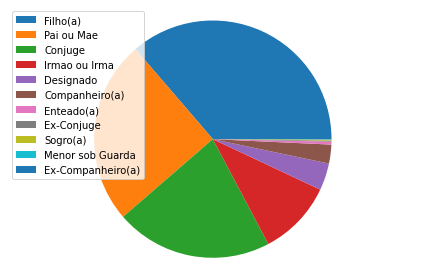

In [115]:
# Gráfico de Distribuição de Parentesco 
# Observa-se que a distribuição é bem similar a do grupo total
plt.pie(dependentes_alocRF.Parentesco.value_counts());
plt.legend(labels=dependentes_alocRF['Parentesco'].value_counts().index.tolist());
plt.axis('equal');
plt.tight_layout();

####Analisando as contribuições destes participantes

In [116]:
# Criando uma nova tabela com todos os ID's dos que têm alocações em Renda Fixa, juntando com a tabela contribuicao
contribuicao_alocRF = pd.merge(alocRF, contribuicao_ult, how='inner', on=['ID'])
contribuicao_alocRF = contribuicao_alocRF.drop(columns=['RendaFixa','DtVigencia_y'])
contribuicao_alocRF = contribuicao_alocRF.rename(columns={"DtVigencia_x": "DtVigencia"})
contribuicao_alocRF.head()

,ID,DtVigencia,Contribuicao
0,1,2020-11-03,4.0
1,2,2020-11-03,8.0
2,3,2020-11-03,5.0
3,4,2020-11-03,62.0
4,5,2020-11-03,8.0


In [117]:
# Verificando se é um grupo de participantes com uma característica específica de contribuições
contribuicao_alocRF.Contribuicao.describe()
# Observa-se que é um grupo bem diverso e similar ao grupo total

count    6021.000000
mean        6.731108
std         3.291327
min         1.000000
25%         4.000000
50%         7.000000
75%         8.000000
max        62.000000
Name: Contribuicao, dtype: float64

In [118]:
# Verificando a moda desta distribuição
contribuicao_alocRF.Contribuicao.mode()

0    8.0
dtype: float64

In [119]:
 # Verificando a distribuição do grupo total
contribuicao.Contribuicao.describe()

count    11415.000000
mean         6.899956
std          3.568717
min          1.000000
25%          4.000000
50%          7.000000
75%          8.000000
max         62.000000
Name: Contribuicao, dtype: float64

In [120]:
# Verificando a moda
contribuicao.Contribuicao.mode()

0    8.0
dtype: float64

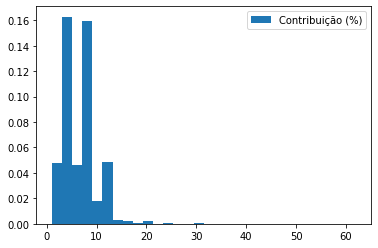

In [121]:
# Gráfico de Distribuição das Contribuições
plt.hist(contribuicao_alocRF['Contribuicao'], bins=30, label='Contribuição (%)', density=True)
plt.legend();
# Observa-se que como se trata da maioria do grupo total, a distribuição é bem similar

###Analisando o perfil dos participantes que têm pelo menos 70% em Renda Fixa

In [149]:
# Montando tabela de IDs com alocação mais recente de pelo menos 70% em Renda Fixa 
antimaioresRV_RF = ultimoperfil[ultimoperfil.RendaFixa >= 70]
antimaioresRV_RF = antimaioresRV_RF.drop(columns=['RendaVariavel','DiffAlocacao','DiffData','DiffID'])
antimaioresRV_RF.head()

,ID,DtVigencia,RendaFixa
21,2,2020-11-03,80.0
32,3,2020-11-03,80.0
53,4,2020-11-03,95.0
71,5,2020-11-03,100.0
93,6,2020-11-03,90.0


####Analisando as características dos participantes que têm pelo menos 70% em Renda Fixa

In [150]:
# Criando uma nova tabela com todos os ID's dos que têm alocações de pelo menos 70% em Renda Fixa 
grupo_antimaioresRV_RF = pd.merge(antimaioresRV_RF, grupo, how='left', on=['ID'])
grupo_antimaioresRV_RF.head()

,ID,DtVigencia,RendaFixa,DtNascimento,Sexo,Escolaridade,FaixaSalarial,DtIncricaoPlano
0,2,2020-11-03,80.0,1978-10-30,M,Superior Completo,L1,2012-02-03
1,3,2020-11-03,80.0,1975-11-13,F,Superior Completo,L1,2011-04-12
2,4,2020-11-03,95.0,1955-06-02,M,Superior Completo,L1,1984-06-25
3,5,2020-11-03,100.0,1971-03-17,F,Superior Completo,L1,2006-03-07
4,6,2020-11-03,90.0,1956-04-03,M,Superior Completo,L1,1976-05-24


In [151]:
# É esperado o oposto do que foi visto no grupo maioresRV
grupo_antimaioresRV_RF.DtNascimento.describe(datetime_is_numeric=True)

count                             4669
mean     1975-06-07 03:09:22.090383232
min                1948-05-13 00:00:00
25%                1967-11-20 00:00:00
50%                1976-09-06 00:00:00
75%                1982-09-20 00:00:00
max                1998-07-07 00:00:00
Name: DtNascimento, dtype: object

In [152]:
# Como a Data  de Nascimento deste grupo é bastante diversa, não se espera um padrão na Data de Inscrição
grupo_antimaioresRV_RF.DtIncricaoPlano.describe(datetime_is_numeric=True)

count                             4669
mean     2008-08-04 20:47:32.859280128
min                1975-08-01 00:00:00
25%                2003-02-20 00:00:00
50%                2012-03-09 00:00:00
75%                2017-07-24 00:00:00
max                2020-09-29 00:00:00
Name: DtIncricaoPlano, dtype: object

In [153]:
# Analisando a distribuição de Escolaridade neste grupo
grupo_antimaioresRV_RF['Escolaridade'].value_counts(normalize=True)

Superior Completo      0.645320
2o. Grau Completo      0.204326
Pos-Graduacao          0.102592
Superior Incompleto    0.032769
Mestrado               0.007496
2o. Grau Incompleto    0.005997
1o. Grau Completo      0.001499
Name: Escolaridade, dtype: float64

In [154]:
# Analisando a distribuição de Escolaridade no grupo total
grupo['Escolaridade'].value_counts(normalize=True)

Superior Completo      0.635341
2o. Grau Completo      0.217075
Pos-Graduacao          0.095963
Superior Incompleto    0.036400
Mestrado               0.007280
2o. Grau Incompleto    0.006618
1o. Grau Completo      0.001324
Name: Escolaridade, dtype: float64

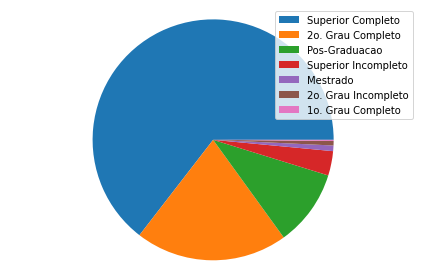

In [155]:
# Gráfico de Distribuição de Escolaridade 
# Observa-se que a proporção de "Superior Completo" é pouco maior nesse grupo do que no grupo total 
# e que a proporção de "2º Grau Completo" é pouco menor
plt.pie(grupo_antimaioresRV_RF.Escolaridade.value_counts());
plt.legend(labels=grupo_antimaioresRV_RF['Escolaridade'].value_counts().index.tolist());
plt.axis('equal');
plt.tight_layout();

In [156]:
# Analisando a distribuição de Sexo neste grupo
grupo_antimaioresRV_RF['Sexo'].value_counts(normalize=True)

M    0.713001
F    0.286999
Name: Sexo, dtype: float64

In [157]:
# Analisando a distribuição de Sexo no grupo total
grupo['Sexo'].value_counts(normalize=True)

M    0.731635
F    0.268365
Name: Sexo, dtype: float64

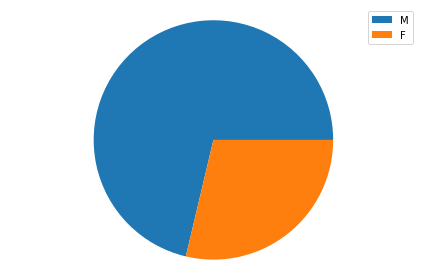

In [158]:
# Gráfico de Distribuição de Sexo
# Observa-se que a proporção de mulheres nesse grupo é maior do que no grupo total
plt.pie(grupo_antimaioresRV_RF.Sexo.value_counts());
plt.legend(labels=grupo_antimaioresRV_RF['Sexo'].value_counts().index.tolist());
plt.axis('equal');
plt.tight_layout();

In [159]:
# Analisando a Distribuição de Faixa Salarial neste grupo
grupo_antimaioresRV_RF['FaixaSalarial'].value_counts(normalize=True)

L2    0.687942
L3    0.234740
L1    0.077318
Name: FaixaSalarial, dtype: float64

In [160]:
# Analisando a Distribuição de Faixa Salarial no grupo total
grupo['FaixaSalarial'].value_counts(normalize=True)

L2    0.704831
L3    0.212111
L1    0.083058
Name: FaixaSalarial, dtype: float64

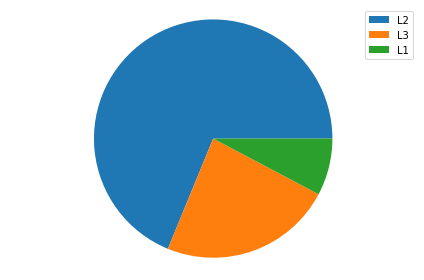

In [162]:
# Gráfico Distribuição de Faixa Salarial de Faixa Salarial
# Observa-se que a proporção de L2 é pouco menor neste grupo do que no grupo total e de L3 é pouco maior
plt.pie(grupo_antimaioresRV_RF.FaixaSalarial.value_counts());
plt.legend(labels=grupo_antimaioresRV_RF['FaixaSalarial'].value_counts().index.tolist());
plt.axis('equal');
plt.tight_layout();

####Analisando as características dos dependentes destes participantes que têm pelo menos 70% em Renda Fixa

In [164]:
# Criando uma nova tabela com todos os ID's dos que têm 70% de alocação em Renda Fixa, juntando com a tabela dependentes
dependentes_antimaioresRV_RF = pd.merge(antimaioresRV_RF, dependentes, how='left', on=['ID'])
dependentes_antimaioresRV_RF = dependentes_antimaioresRV_RF.drop(columns=['RendaFixa','DtVigencia'])
dependentes_antimaioresRV_RF.head()

,ID,Parentesco,DtNascimento
0,2,Conjuge,1975-07-03
1,2,Filho(a),2009-07-03
2,3,NaN,NaT
3,4,Pai ou Mae,1927-11-07
4,4,Pai ou Mae,1929-05-04


In [165]:
# Excluindo valores nulos
dependentes_antimaioresRV_RF_clean=dependentes_antimaioresRV_RF.dropna()
print(dependentes_antimaioresRV_RF_clean.isnull().any())

ID              False
Parentesco      False
DtNascimento    False
dtype: bool


In [167]:
# Verificando se existe um grupo de dependentes em comum entre os participantes
dependentes_antimaioresRV_RF = dependentes_antimaioresRV_RF_clean
dependentes_antimaioresRV_RF.DtNascimento.describe(datetime_is_numeric=True)
# Observa-se que é um grupo bem diverso e próximo ao grupo total

count                            13597
mean     1979-07-24 23:13:24.089138112
min                1900-01-01 00:00:00
25%                1961-11-02 00:00:00
50%                1981-08-31 00:00:00
75%                1998-04-24 00:00:00
max                2020-08-19 00:00:00
Name: DtNascimento, dtype: object

In [168]:
# Analisando a distribuição de Parentesco neste grupo
dependentes_antimaioresRV_RF['Parentesco'].value_counts(normalize=True)

Filho(a)             0.377289
Pai ou Mae           0.238729
Conjuge              0.210855
Irmao ou Irma        0.100978
Designado            0.037214
Companheiro(a)       0.028021
Enteado(a)           0.003898
Sogro(a)             0.001177
Ex-Conjuge           0.001177
Ex-Companheiro(a)    0.000368
Menor sob Guarda     0.000294
Name: Parentesco, dtype: float64

In [169]:
# Analisando a distribuição de Parentesco no grupo total
dependentes['Parentesco'].value_counts(normalize=True)

Filho(a)             0.363071
Pai ou Mae           0.250572
Conjuge              0.213913
Irmao ou Irma        0.102469
Designado            0.036952
Companheiro(a)       0.025691
Enteado(a)           0.003930
Ex-Conjuge           0.001408
Sogro(a)             0.001232
Menor sob Guarda     0.000411
Ex-Companheiro(a)    0.000352
Name: Parentesco, dtype: float64

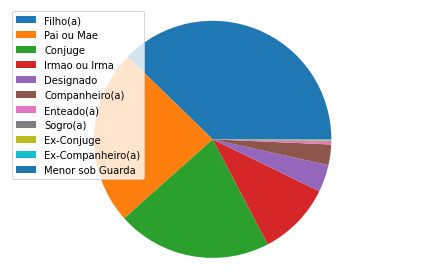

In [170]:
# Gráfico de Distribuição de Parentesco 
# Observa-se que a distribuição é bem similar a do grupo total, sendo a proporção de Filho (a) pouco maior e Pai ou Mae pouco menor
plt.pie(dependentes_antimaioresRV_RF.Parentesco.value_counts());
plt.legend(labels=dependentes_antimaioresRV_RF['Parentesco'].value_counts().index.tolist());
plt.axis('equal');
plt.tight_layout();

####Analisando as contribuições destes participantes que têm pelo menos 70% em Renda Fixa

In [171]:
# Criando uma nova tabela com todos os ID's dos que têm 70% de alocação em Renda Fixa, juntando com a tabela contribuicao
contribuicao_antimaioresRV_RF = pd.merge(antimaioresRV_RF, contribuicao_ult, how='inner', on=['ID'])
contribuicao_antimaioresRV_RF = contribuicao_antimaioresRV_RF.drop(columns=['RendaFixa','DtVigencia_y'])
contribuicao_antimaioresRV_RF = contribuicao_antimaioresRV_RF.rename(columns={"DtVigencia_x": "DtVigencia"})
contribuicao_antimaioresRV_RF.head()

,ID,DtVigencia,Contribuicao
0,2,2020-11-03,8.0
1,3,2020-11-03,5.0
2,4,2020-11-03,62.0
3,5,2020-11-03,8.0
4,6,2020-11-03,15.0


In [172]:
# Verificando se é um grupo de participantes com uma característica específica de contribuições
contribuicao_antimaioresRV_RF.Contribuicao.describe()
# Observa-se que é um grupo bem diverso e similar ao grupo total

count    4653.000000
mean        6.983881
std         3.404191
min         1.000000
25%         4.000000
50%         8.000000
75%         8.000000
max        62.000000
Name: Contribuicao, dtype: float64

In [173]:
contribuicao_antimaioresRV_RF.Contribuicao.mode()

0    8.0
dtype: float64

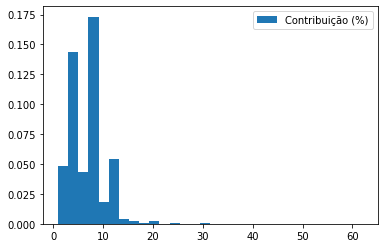

In [174]:
# Gráfico de Distribuição das Contribuições
plt.hist(contribuicao_antimaioresRV_RF['Contribuicao'], bins=30, label='Contribuição (%)', density=True)
plt.legend();
# Observa-se que a distribuição é bem similar ao grupo total

###Analisando o perfil dos 25% dos participantes que mais têm Renda Fixa

In [122]:
# Na tabela perfil, observa-se que 25% dos participantes têm 100% alocado em Renda Fixa
ultimoperfil.RendaFixa.describe()

count    6042.000000
mean       81.412777
std        21.075119
min        40.000000
25%        70.000000
50%        90.000000
75%       100.000000
max       100.000000
Name: RendaFixa, dtype: float64

In [123]:
# Montando tabela de IDs com alocação mais recente de 100% em Renda Fixa 
maioresRF = ultimoperfil[ultimoperfil.RendaFixa == 100]
maioresRF = maioresRF.drop(columns=['RendaVariavel','DiffAlocacao','DiffData','DiffID'])
maioresRF.head()

,ID,DtVigencia,RendaFixa
71,5,2020-11-03,100.0
136,8,2020-11-03,100.0
157,9,2020-11-03,100.0
177,10,2020-11-03,100.0
210,12,2020-11-03,100.0


####Analisando as características dos participantes que mais têm Renda Fixa

In [124]:
# Criando uma nova tabela com todos os ID's dos que têm maiores alocações em Renda Fixa (100% de alocação)
grupo_maioresRF = pd.merge(maioresRF, grupo, how='left', on=['ID'])
grupo_maioresRF.head()

,ID,DtVigencia,RendaFixa,DtNascimento,Sexo,Escolaridade,FaixaSalarial,DtIncricaoPlano
0,5,2020-11-03,100.0,1971-03-17,F,Superior Completo,L1,2006-03-07
1,8,2020-11-03,100.0,1960-08-21,M,Superior Completo,L1,1993-11-24
2,9,2020-11-03,100.0,1958-10-30,F,2o. Grau Completo,L1,1993-11-25
3,10,2020-11-03,100.0,1955-11-25,F,Superior Completo,L1,1984-07-03
4,12,2020-11-03,100.0,1957-02-03,F,Superior Completo,L2,1978-01-09


In [125]:
# É esperado o oposto do que foi visto no grupo maioresRV
grupo_maioresRF.DtNascimento.describe(datetime_is_numeric=True)

count                             2305
mean     1976-04-04 01:43:04.815618208
min                1948-05-13 00:00:00
25%                1969-04-27 00:00:00
50%                1978-01-29 00:00:00
75%                1983-05-27 00:00:00
max                1997-10-16 00:00:00
Name: DtNascimento, dtype: object

In [126]:
# Como a Data  de Nascimento deste grupo é bastante diversa, não se espera um padrão na Data de Inscrição
grupo_maioresRF.DtIncricaoPlano.describe(datetime_is_numeric=True)

count                             2305
mean     2009-05-15 20:23:13.145336832
min                1975-08-20 00:00:00
25%                2005-06-15 00:00:00
50%                2014-01-10 00:00:00
75%                2017-07-24 00:00:00
max                2020-09-25 00:00:00
Name: DtIncricaoPlano, dtype: object

In [127]:
# Analisando a distribuição de Escolaridade neste grupo
grupo_maioresRF['Escolaridade'].value_counts(normalize=True)

Superior Completo      0.646855
2o. Grau Completo      0.207375
Pos-Graduacao          0.095445
Superior Incompleto    0.034707
Mestrado               0.007809
2o. Grau Incompleto    0.006508
1o. Grau Completo      0.001302
Name: Escolaridade, dtype: float64

In [128]:
# Analisando a distribuição de Escolaridade no grupo total
grupo['Escolaridade'].value_counts(normalize=True)

Superior Completo      0.635341
2o. Grau Completo      0.217075
Pos-Graduacao          0.095963
Superior Incompleto    0.036400
Mestrado               0.007280
2o. Grau Incompleto    0.006618
1o. Grau Completo      0.001324
Name: Escolaridade, dtype: float64

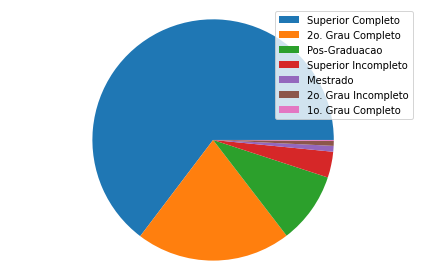

In [129]:
# Gráfico de Distribuição de Escolaridade 
# Observa-se que a proporção de "Superior Completo" é maior nesse grupo do que no grupo total e que a proporção de "2º Grau Completo" é menor
plt.pie(grupo_maioresRF.Escolaridade.value_counts());
plt.legend(labels=grupo_maioresRF['Escolaridade'].value_counts().index.tolist());
plt.axis('equal');
plt.tight_layout();

In [130]:
# Analisando a distribuição de Sexo neste grupo
grupo_maioresRF['Sexo'].value_counts(normalize=True)

M    0.686334
F    0.313666
Name: Sexo, dtype: float64

In [131]:
# Analisando a distribuição de Sexo no grupo total
grupo['Sexo'].value_counts(normalize=True)

M    0.731635
F    0.268365
Name: Sexo, dtype: float64

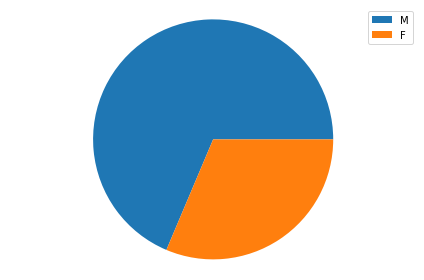

In [132]:
# Gráfico de Distribuição de Sexo
# Observa-se que a proporção de mulheres nesse grupo é maior do que no grupo total
plt.pie(grupo_maioresRF.Sexo.value_counts());
plt.legend(labels=grupo_maioresRF['Sexo'].value_counts().index.tolist());
plt.axis('equal');
plt.tight_layout();

In [133]:
# Analisando a Distribuição de Faixa Salarial neste grupo
grupo_maioresRF['FaixaSalarial'].value_counts(normalize=True)

L2    0.717570
L3    0.198698
L1    0.083731
Name: FaixaSalarial, dtype: float64

In [134]:
# Analisando a Distribuição de Faixa Salarial no grupo total
grupo['FaixaSalarial'].value_counts(normalize=True)

L2    0.704831
L3    0.212111
L1    0.083058
Name: FaixaSalarial, dtype: float64

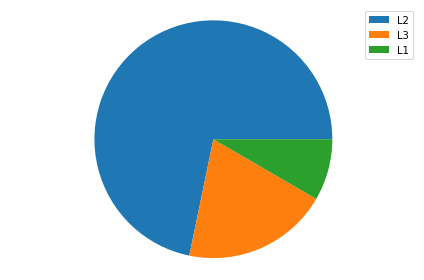

In [135]:
# Gráfico Distribuição de Faixa Salarial de Faixa Salarial
# Observa-se que a proporção de L2 é pouco maior neste grupo do que no grupo total e de L3 é pouco menor
plt.pie(grupo_maioresRF.FaixaSalarial.value_counts());
plt.legend(labels=grupo_maioresRF['FaixaSalarial'].value_counts().index.tolist());
plt.axis('equal');
plt.tight_layout();

####Analisando as características dos dependentes destes participantes que têm 100% em Renda Fixa

In [136]:
# Criando uma nova tabela com todos os ID's dos que têm alocações em Renda Fixa, juntando com a tabela dependentes
dependentes_maioresRF = pd.merge(maioresRF, dependentes, how='left', on=['ID'])
dependentes_maioresRF = dependentes_maioresRF.drop(columns=['RendaFixa','DtVigencia'])
dependentes_maioresRF.head()

,ID,Parentesco,DtNascimento
0,5,Conjuge,1971-04-17
1,5,Filho(a),1998-02-20
2,5,Filho(a),2002-01-14
3,8,Conjuge,1948-10-10
4,8,Enteado(a),1975-10-02


In [137]:
# Verificando se existe um grupo de dependentes em comum entre os participantes
dependentes_maioresRF.DtNascimento.describe(datetime_is_numeric=True)
# Observa-se que é um grupo bem diverso e próximo ao grupo total

count                             6579
mean     1979-08-17 03:16:06.894664512
min                1900-01-12 00:00:00
25%                1961-04-02 12:00:00
50%                1981-05-07 00:00:00
75%                1998-07-13 00:00:00
max                2020-08-19 00:00:00
Name: DtNascimento, dtype: object

In [138]:
# Analisando a distribuição de Parentesco neste grupo
dependentes_maioresRF['Parentesco'].value_counts(normalize=True)

Filho(a)             0.359119
Pai ou Mae           0.246353
Conjuge              0.212766
Irmao ou Irma        0.105623
Designado            0.040729
Companheiro(a)       0.027508
Enteado(a)           0.004103
Sogro(a)             0.001672
Ex-Conjuge           0.001368
Menor sob Guarda     0.000608
Ex-Companheiro(a)    0.000152
Name: Parentesco, dtype: float64

In [139]:
# Analisando a distribuição de Parentesco no grupo total
dependentes['Parentesco'].value_counts(normalize=True)

Filho(a)             0.363071
Pai ou Mae           0.250572
Conjuge              0.213913
Irmao ou Irma        0.102469
Designado            0.036952
Companheiro(a)       0.025691
Enteado(a)           0.003930
Ex-Conjuge           0.001408
Sogro(a)             0.001232
Menor sob Guarda     0.000411
Ex-Companheiro(a)    0.000352
Name: Parentesco, dtype: float64

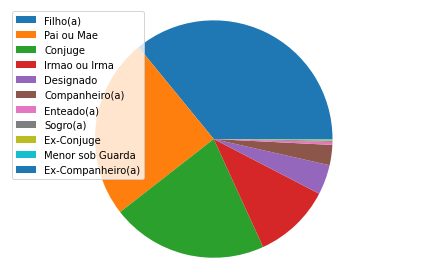

In [140]:
# Gráfico de Distribuição de Parentesco 
# Observa-se que a distribuição é bem similar a do grupo total
plt.pie(dependentes_maioresRF.Parentesco.value_counts());
plt.legend(labels=dependentes_maioresRF['Parentesco'].value_counts().index.tolist());
plt.axis('equal');
plt.tight_layout();

####Analisando as contribuições destes participantes que têm 100% em Renda Fixa

In [141]:
# Criando uma nova tabela com todos os ID's dos que têm alocações em Renda Fixa, juntando com a tabela contribuicao
contribuicao_maioresRF = pd.merge(maioresRF, contribuicao_ult, how='inner', on=['ID'])
contribuicao_maioresRF = contribuicao_maioresRF.drop(columns=['RendaFixa','DtVigencia_y'])
contribuicao_maioresRF = contribuicao_maioresRF.rename(columns={"DtVigencia_x": "DtVigencia"})
contribuicao_maioresRF.head()

,ID,DtVigencia,Contribuicao
0,5,2020-11-03,8.0
1,8,2020-11-03,12.0
2,9,2020-11-03,8.0
3,10,2020-11-03,8.0
4,12,2020-11-03,3.0


In [142]:
# Verificando se é um grupo de participantes com uma característica específica de contribuições
contribuicao_maioresRF.Contribuicao.describe()
# Observa-se que é um grupo bem diverso e similar ao grupo total

count    2301.000000
mean        6.726206
std         3.254663
min         1.000000
25%         4.000000
50%         7.000000
75%         8.000000
max        35.000000
Name: Contribuicao, dtype: float64

In [143]:
contribuicao_maioresRF.Contribuicao.mode()

0    8.0
dtype: float64

In [144]:
contribuicao.Contribuicao.describe()

count    11415.000000
mean         6.899956
std          3.568717
min          1.000000
25%          4.000000
50%          7.000000
75%          8.000000
max         62.000000
Name: Contribuicao, dtype: float64

In [145]:
contribuicao.Contribuicao.mode()

0    8.0
dtype: float64

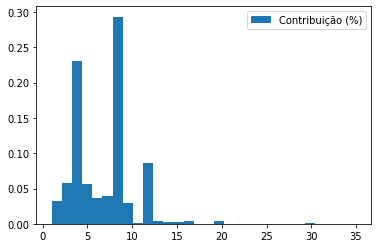

In [146]:
# Gráfico de Distribuição das Contribuições
plt.hist(contribuicao_maioresRF['Contribuicao'], bins=30, label='Contribuição (%)', density=True)
plt.legend();
# Observa-se que a distribuição é bem similar ao grupo total